# Analyzing Manhattan Rolling Sales Data from November 2022 to October 2023 using Python and Seaborn


image goes here

,RECORD INDEX,NEIGHBORHOOD,BLDGCAT,BLDGDESCRIPTION,TAXCLP,BLOCK,LOT,BLDGCP,ADDRESS,ZIP_CODE,RESIDENTIAL_ UNITS,COMMERCIAL_UNITS,UNITS,LANDSFT,GROSSSF,BUILT,TAXCLSALE,BLDGCTOS,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,2,TWO FAMILY DWELLINGS,1,372,36,S2,19 AVENUE D,10009,2.0,1.0,3.0,826,"2,481",1900.0,1,S2,$1.00,1/20/2023
1,2,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,390,50,C1,"209 EAST 7TH STREET, 3E",10009,29.0,0.0,29.0,"3,900","18,099",1900.0,2,C1,"$154,196.00",9/15/2023
2,3,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2,390,50,C1,"209 EAST 7TH STREET, 4E",10009,29.0,0.0,29.0,"3,900","18,099",1900.0,2,C1,"$154,196.00",9/15/2023
3,4,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2A,390,60,C2,191 EAST 7TH STREET,10009,5.0,0.0,5.0,"1,080","3,328",1910.0,2,C2,"$2,725,000.00",8/10/2023
4,5,ALPHABET CITY,7,RENTALS - WALKUP APARTMENTS,2B,396,4,C4,221 AVENUE B,10009,8.0,1.0,9.0,"1,936","5,538",1904.0,2,C4,$10.00,3/31/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16937,16938,WASHINGTON HEIGHTS UPPER,22,STORE BUILDINGS,4,2175,63,K1,180 DYCKMAN STREET,10040,0.0,5.0,5.0,"5,000","5,000",1927.0,4,K1,$0.00,10/31/2023
16938,16939,WASHINGTON HEIGHTS UPPER,22,STORE BUILDINGS,4,2175,66,K1,172 DYCKMAN STREET,10040,0.0,6.0,6.0,"10,000","9,500",1927.0,4,K1,$0.00,6/20/2023
16939,16940,WASHINGTON HEIGHTS UPPER,22,STORE BUILDINGS,4,2175,66,K1,172 DYCKMAN STREET,10040,0.0,6.0,6.0,"10,000","9,500",1927.0,4,K1,$0.00,9/22/2023
16940,16941,WASHINGTON HEIGHTS UPPER,29,COMMERCIAL GARAGES,4,2172,1,G6,4560 BROADWAY,10040,0.0,0.0,0.0,"15,450",0,NaN,4,G6,"$15,000,000.00",11/16/2022


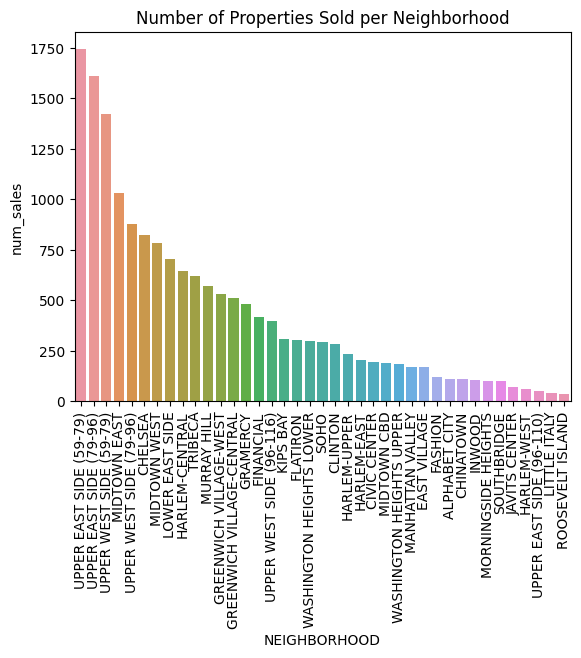

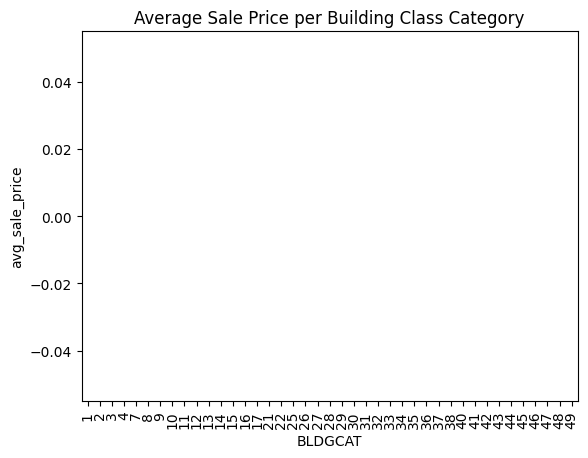

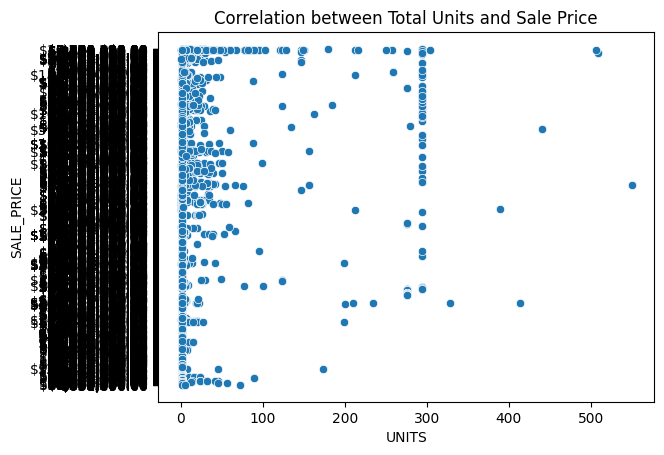

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step 1: Read the CSV File
csv_file = r'C:\Users\Wolfrank\Desktop\Data-SQL\ManhattanRE\Data\ManhattanData.csv'  # Use a raw string for the file path
df = pd.read_csv(csv_file).round(2)

# Print or Display DataFrame

display(df)


# Connect to the SQLite database
conn = sqlite3.connect('manhattan_sales.db')

# Create the SQL table
df.to_sql('sales_data', conn, if_exists='replace', index=False)

# Define queries and create visualizations

# Query 1: Number of properties sold per neighborhood
query1 = """
SELECT NEIGHBORHOOD, COUNT(*) AS num_sales
FROM sales_data
GROUP BY NEIGHBORHOOD
ORDER BY num_sales DESC
"""
df_sales_by_neighborhood = pd.read_sql_query(query1, conn)

sns.barplot(x='NEIGHBORHOOD', y='num_sales', data=df_sales_by_neighborhood)
plt.xticks(rotation=90)
plt.title('Number of Properties Sold per Neighborhood')
plt.show()

# Query 2: Average sale price per building class category
query2 = """
SELECT BLDGCAT, AVG(SALE_PRICE) AS avg_sale_price
FROM sales_data
GROUP BY BLDGCAT
ORDER BY avg_sale_price DESC
"""
df_avg_price_by_category = pd.read_sql_query(query2, conn)

sns.barplot(x='BLDGCAT', y='avg_sale_price', data=df_avg_price_by_category)
plt.xticks(rotation=90)
plt.title('Average Sale Price per Building Class Category')
plt.show()

# Query 3: Correlation between total units and sale price
sns.scatterplot(x='UNITS', y='SALE_PRICE', data=df)
plt.title('Correlation between Total Units and Sale Price')
plt.show()

# Query 4: Distribution of sale price per year built
sns.boxplot(x='BUILT', y='SALE_PRICE', data=df)
plt.title('Distribution of Sale Price per Year Built')
plt.xticks(rotation=45)
plt.show()

# Query 5: Heatmap of sale price based on building class category and neighborhood
df_pivot = df.pivot_table(values='SALE_PRICE', index='BLDGCAT', columns='NEIGHBORHOOD')
sns.heatmap(df_pivot, annot=True)
plt.title('Heatmap of Sale Price by Building Class Category and Neighborhood')
plt.show()

# Query 6: Line graph showing total sales per month
df['SALE_MONTH'] = pd.to_datetime(df['SALE_DATE']).dt.month
df_sales_per_month = df.groupby('SALE_MONTH').agg(count=('SALE_DATE', 'count'))

sns.lineplot(x='SALE_MONTH', y='count', data=df_sales_per_month)
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Total Sales per Month')
plt.show()

# Query 7: Stacked histogram of property types sold
df_by_types = df.groupby('BLDGDESCRIPTION').agg(count=('SALE_DATE', 'count'))

sns.histplot(df_by_types.index, weights='count', cumulative=True)
plt.xticks(rotation=90)
plt.title('Stacked Histogram of Property Types Sold')
plt.show()

# Query 8: Donut chart of property sales by tax class at time of sale
df_tax_class_sales = df.groupby('TAXCLSALE').agg(count=('SALE_DATE', 'count'))

plt.pie(df_tax_class_sales['count'], labels=df_tax_class_sales.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Donut Chart of Property Sales by Tax Class at Time of Sale')
plt.show()

# Query 9: Scatter plot of sale price vs. land square footage
sns.scatterplot(x='LANDSFT', y='SALE_PRICE', data=df)
plt.title('Sale Price vs. Land Square Footage')
plt.show()


